# Optional Lab: Gradient Descent for Logistic Regression

## Goals
In this lab, you will:
- update gradient descent for logistic regression.
- explore gradient descent on a familiar data set

In [1]:
import copy, math
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_common import  dlc, plot_data, plt_tumor_data, sigmoid
from plt_quad_logistic import plt_quad_logistic, plt_prob
plt.style.use('deeplearning.mplstyle')

In [36]:
X_train = np.array([[-4,0],[-3,0],[-2,0],[-1,0],[0,0],[1,10],[2,10],[3,10],[4,10],[5.0,10]])
y_train = np.array([0,  0, 0, 0, 0, 1, 1, 1, 1, 1])

In [31]:
X_train = np.array([[-4.0,0,-1],[-3.0,0,-2],[-2.0,0,-3],[-1.0,0,-4],[0,0,0],[1.0,10,1],[2.0,10,2],[3.0,10,3],[4.0,10,4],[5.0,10,5]])
y_train = np.array([0,  0, 0, 0, 0, 1, 1, 1, 1, 1])

As before, we'll use a helper function to plot this data. <br>
The data points with label  𝑦=1 are shown as red crosses, <br>
while the data points with label  𝑦=0 are shown as blue circles. <br>

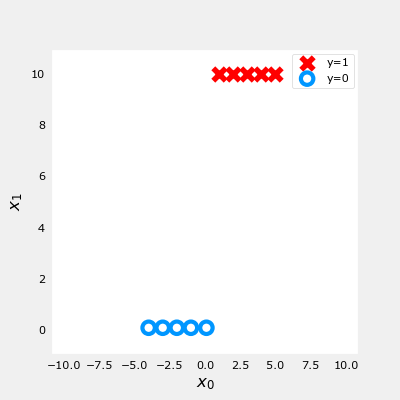

In [3]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X_train, y_train, ax)

ax.axis([-11, 11, -1, 11])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

## Logistic Gradient Descent
<img align="right" src="./images/C1_W3_Logistic_gradient_descent.png"     style=" width:400px; padding: 10px; " >

Recall the gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$

### Gradient Descent Implementation
The gradient descent algorithm implementation has two components: 
- 수식(1)의 반복문 구현, 이것은 `gradient_descent` 이고 실무에서는 선택사항
- 현재의 기울기 계산은 , 위의 수식 (2,3) , 이것은 `compute_gradient_logistic`  , 아래서 구현

#### Calculating the Gradient, Code Description
all $w_j$ and $b$ 에 대하여 위의 수식 (2),(3)을 구현
There are many ways to implement this. Outlined below is this:
- initialize variables to accumulate `dj_dw` and `dj_db`
- for each example(학습 데이터들)
    - calculate the error for that example $g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) - \mathbf{y}^{(i)}$
    - for each input value $x_{j}^{(i)}$ in 하나의 training 데이터,  
        - multiply the error by the input  $x_{j}^{(i)}$, and add to the corresponding element of `dj_dw`. (equation 2 above)
    - add the error to `dj_db` (equation 3 above)

- divide `dj_db` and `dj_dw` by total number of examples (m)
-  $\mathbf{x}^{(i)}$ 는 numpy 데이터 `X[i,:]` or `X[i]`  and $x_{j}^{(i)}$ is `X[i,j]`

In [4]:
def compute_gradient_logistic(X,y,w,b):
    """
        선형 회귀를 위한 기울기 계산
        Args:
            X(ndarray(m,n)): n개의 feature를 가진 m개의 training(학습) 데이터
            y(ndarray(m,)): target(정답)
            w(ndarray(m,)): 우리가 찾고자하는 파라미터(weight, parameter)
            b(스칼라):  우리가 찾고자하는 파라미터(bais, y 절편)
        Returns:
            dj_dw(ndarray(n,)) cost를 w로 미분
            dj_db(스칼라) cost를 b로 미분
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    
    for i in range(m):
        f_wb_i=sigmoid(np.dot(X[i],w)+b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j]+=err_i*X[i,j]
        dj_db+=err_i
    dj_dw /= m #(n,)
    dj_db /= m #스칼라
    return dj_db,dj_dw

In [5]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp,dj_dw_tmp = compute_gradient_logistic(X_tmp,y_tmp,w_tmp,b_tmp)
print(f"dj_db:{dj_db_tmp}")
print(f"dj_dw:{dj_dw_tmp}")

dj_db:0.49861806546328574
dj_dw:[0.5 0.5]


**Expected output**
``` 
dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]
```

#### Gradient Descent Code 
The code implementing equation (1) above is implemented below. Take a moment to locate and compare the functions in the routine to the equations above.


## Cost function(비용함수) 

*logistic loss* 함수를 개발했음

하나의 훈련데이터에 적용한것이 loss(손실)
 **cost** 를 만들기 위해 여러개의 총 loss를 활용했음 

로지스틱회귀에서의   cost  함수는 아래의 공식 

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ 는 하나의 학습데이터이고 :

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
*  여기서   m  은 학습할 데이터의 개수 
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5} 
\end{align}
$$

In [6]:
def compute_cost_logistic(X,y,w,b,lambda_=0,safe=False):
    """
        로지스틱 손실, 행렬이 아닌 버전의 코스트 계산
        Args :
            X(ndarray):shape(m,n), n개의 feature를 가진 여러개(m개의 training data)의 행렬
            y(ndarray):shape(m,) target value => model의 출력(prediction/hypothesis,label/정답)
            정답(y)와 모델의 출력(y^hat)의 cross tntropy가 logistic regression의 cost
            w(ndarray): shape(n,)우리가 구하고자 하는 feature에 대응되는 파라미터 (theta/weigth/가중치)
            b(스칼라): 우리가 구하고자하는 bais(절편)
            lambda_(스칼라,float), 정규화를 제어하기 위한 값, 정규화가 없을때는 0
            이것은 나중에 배웁니다.overfitting(과적합)을 해결하기 위한 요소
            sare(boolean) , overflow 안전 알고리즘 적용 여부
        Returns:
            cost(스칼라)
    """
    m,n =X.shape
    cost=0.0
    for i in range(m):
        z_i = np.dot(X[i],w)+b
        f_wb_i = sigmoid(z_i)
        cost += -y[i]*np.log(f_wb_i)-(1-y[i])*np.log(1-f_wb_i)
    cost/=m
    return cost

In [7]:
def gradient_descent(X,y,w_in,b_in,alpha,num_iters):
    """
        Batch(여러개의 데이터를 묶어서) 단위로 경사하강법 수행
        Args:
            X(ndarray(m,n)): n개의 feature를 가진 m개의 training(학습) 데이터
            y(ndarray(m,)): target(정답)
            w_in(ndarray(m,)): 우리가 찾고자하는 파라미터(weight, parameter)
            b_in(스칼라):  우리가 찾고자하는 파라미터(bais, y 절편)
            alpha(float): 학습율(learning_rate)
            num_iters(스칼라): 경사 하강을 동작시키기 위한 반복 횟수
        Returns:
            w(ndarray(n,)) 갱신된 파라미터의 값
            b(스칼라) 갱신된 파라미터의 값
    """
    J_history=[]
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_db,dj_dw=compute_gradient_logistic(X,y,w,b)
        w -= alpha*dj_dw #미분한 값에 학습률 곱해서 뺌
        b -= alpha*dj_db
        if i<100000:
            J_history.append(compute_cost_logistic(X,y,w,b))
        if i%math.ceil(num_iters/10)==0:
            print(f"반복{i:4d}:cost{J_history[-1]}")
    return w,b,J_history

In [37]:
w_tmp = np.zeros_like(X_train[0])
b_tmp = 0.
alpha = 0.1
iters = 10000
w_out,b_out , c_ = gradient_descent(X_train,y_train,w_tmp,b_tmp,alpha,iters)
print(f"\n 갱신된 파라미터 : w : {w_out},b : {b_out}, cost : {c_[-1]}")

반복   0:cost0.31772582826849854
반복1000:cost0.009671709783786269
반복2000:cost0.005001181286694586
반복3000:cost0.003365698792273135
반복4000:cost0.0025346785793760778
반복5000:cost0.0020322580290528516
반복6000:cost0.0016958720204539924
반복7000:cost0.001454949422670203
반복8000:cost0.0012739292471110287
반복9000:cost0.0011329535636189995

 갱신된 파라미터 : w : [2.15 1.13],b : -4.722654129006664, cost : 0.0010201661984014444


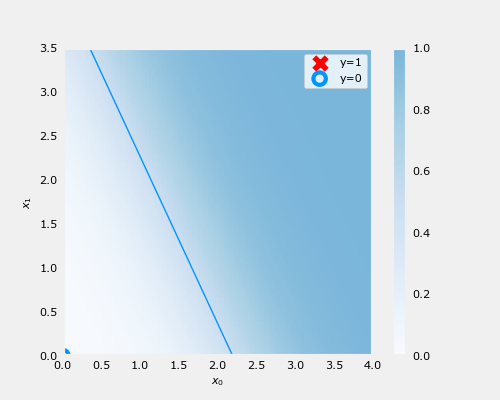

In [25]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
plt_prob(ax,w_out,b_out)

ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
ax.axis([0,4,0,3.5])
plot_data(X_train,y_train,ax)
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0],c=dlc['dlblue'],lw=1)
plt.show()

In the plot above:
 - the shading reflects the probability(확률) y=1 (result prior to decision boundary(결정 경계선))
 - the decision boundary is the line at which the probability = 0.5

## Another Data set
Let's return to a one-variable data set. With just two parameters, $w$, $b$,
어떤 경사하강까지가 더 좋은 아이디어를 얻기위한 contour plot을 이용하여 cost함수를 그려볼수있다.

In [10]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

As before, we'll use a helper function to plot this data.<br> 
The data points with label  𝑦=1 are shown as red crosses,<br>
while the data points with label  𝑦=0 are shown as blue circles.

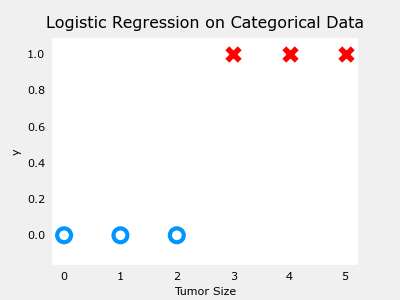

In [11]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
plt_tumor_data(x_train,y_train,ax)
plt.show()

In the plot below, try:
- changing $w$ and $b$ by clicking within the contour plot on the upper right.
    - changes may take a second or two
    - note the changing value of cost on the upper left plot.
    - note the cost is accumulated by a loss on each example (vertical dotted lines)
- run gradient descent by clicking the orange button.
    - note the steadily decreasing cost (contour and cost plot are in log(cost) 
    - clicking in the contour plot will reset the model for a new run
- to reset the plot, rerun the cell